In [9]:
#%pip install matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [10]:
pokedex = pd.read_csv('pokemon_data.csv')

poke = pokedex

poke

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [11]:
PsyPoke = poke.loc[(poke['Type 1'] == 'Psychic') | (poke['Type 2'] == "Psychic")]
PsyPoke.reset_index(drop = True, inplace=True)
PsyPoke

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,63,Abra,Psychic,NaN,25,20,15,105,55,90,1,False
1,64,Kadabra,Psychic,NaN,40,35,30,120,70,105,1,False
2,65,Alakazam,Psychic,NaN,55,50,45,135,95,120,1,False
3,65,AlakazamMega Alakazam,Psychic,NaN,55,50,65,175,95,150,1,False
4,79,Slowpoke,Water,Psychic,90,65,65,40,40,15,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
85,678,MeowsticFemale,Psychic,NaN,74,48,76,83,81,104,6,False
86,686,Inkay,Dark,Psychic,53,54,53,37,46,45,6,False
87,687,Malamar,Dark,Psychic,86,92,88,68,75,73,6,False
88,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True


In [92]:
GenPsy = PsyPoke.groupby(['Generation'],as_index=False).mean(numeric_only=True)
GenPsy = GenPsy.drop(columns=["#"] + ["Legendary"])
Stats = GenPsy.columns.tolist()
Stats.remove("Generation")
GenPsy







,Generation,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1,74.333333,74.777778,74.166667,112.388889,85.555556,85.777778
1,2,82.400000,67.000000,67.100000,86.500000,81.000000,74.600000
2,3,63.285714,79.214286,78.678571,90.821429,88.678571,84.928571
3,4,67.500000,83.300000,88.200000,74.800000,100.700000,72.600000
4,5,76.000000,52.625000,68.750000,97.937500,79.125000,56.000000
5,6,73.000000,78.625000,67.375000,96.000000,87.875000,81.000000


In [94]:
PsyGen1 = GenPsy.loc[(GenPsy['Generation'] == 1)]
PsyGen2 = GenPsy.loc[(GenPsy['Generation'] == 2)]
PsyGen3 = GenPsy.loc[(GenPsy['Generation'] == 3)]
PsyGen4 = GenPsy.loc[(GenPsy['Generation'] == 4)]
PsyGen5 = GenPsy.loc[(GenPsy['Generation'] == 5)]
PsyGen6 = GenPsy.loc[(GenPsy['Generation'] == 6)]

PsyGen1 = PsyGen1.drop(columns=["Generation"]).values.flatten().tolist()
PsyGen2 = PsyGen2.drop(columns=["Generation"]).values.flatten().tolist()
PsyGen3 = PsyGen3.drop(columns=["Generation"]).values.flatten().tolist()
PsyGen4 = PsyGen4.drop(columns=["Generation"]).values.flatten().tolist()
PsyGen5 = PsyGen5.drop(columns=["Generation"]).values.flatten().tolist()
PsyGen6 = PsyGen6.drop(columns=["Generation"]).values.flatten().tolist()


In [95]:
angles = np.linspace(0,2*np.pi,len(Stats), endpoint=False)
print(angles)
angles = np.concatenate((angles,[angles[0]]))

Stats.append(Stats[0])
PsyGen1.append(PsyGen1[0])
PsyGen2.append(PsyGen2[0])
PsyGen3.append(PsyGen3[0])
PsyGen4.append(PsyGen4[0])
PsyGen5.append(PsyGen5[0])
PsyGen6.append(PsyGen6[0])


[0.         1.04719755 2.0943951  3.14159265 4.1887902  5.23598776]


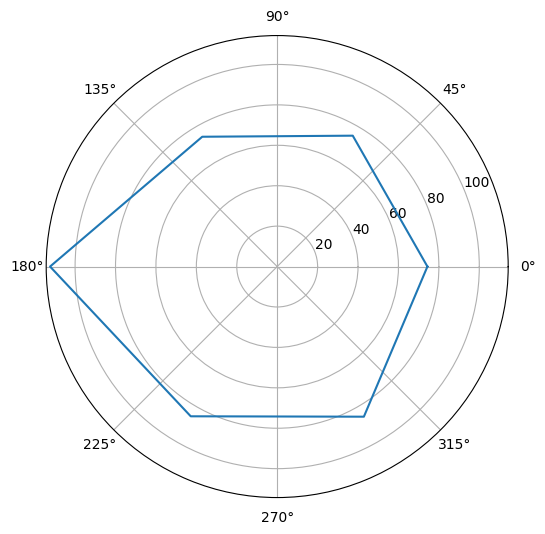

In [98]:
fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(polar=True)
ax.plot(angles,PsyGen1)
plt.show()


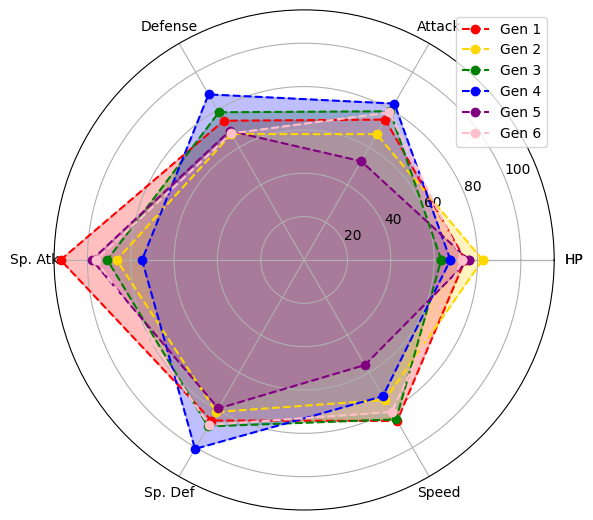

In [111]:
fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(polar=True)
#Gen 1
ax.plot(angles,PsyGen1, 'o--', color='r', label='Gen 1')
ax.fill(angles, PsyGen1, alpha=0.25, color='r')
#Gen 2
ax.plot(angles,PsyGen2, 'o--', color='gold', label='Gen 2')
ax.fill(angles, PsyGen2, alpha=0.25, color='gold')
#Gen 3
ax.plot(angles,PsyGen3, 'o--', color='g', label='Gen 3')
ax.fill(angles, PsyGen3, alpha=0.25, color='g')
#Gen 4
ax.plot(angles,PsyGen4, 'o--', color='b', label='Gen 4')
ax.fill(angles, PsyGen4, alpha=0.25, color='b')
#Gen 5
ax.plot(angles,PsyGen5, 'o--', color='purple', label='Gen 5')
ax.fill(angles, PsyGen5, alpha=0.25, color='purple')
#Gen 6
ax.plot(angles,PsyGen6, 'o--', color='pink', label='Gen 6')
ax.fill(angles, PsyGen6, alpha=0.25, color='pink')
#Add labels
ax.set_thetagrids(angles * 180/np.pi, Stats)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()